In [36]:
import re

from collections import defaultdict

def calculate_averages(file_path):
    # Dictionary to store values for each category
    data = defaultdict(list)

    # Read the file and extract values
    with open(file_path, 'r') as file:
        for line in file:
            elements = line.strip().split(',')
            for i in range(0, len(elements) - 1, 2):
                key = elements[i]
                value = float(elements[i + 1])
                data[key].append(value)

    # Calculate averages
    averages = {key: sum(values) / len(values) for key, values in data.items()}
    
    return averages

# Usage
file_path = "/ephemeral/home/taremu/projects/watermark-supression/results/4keys_Unigram/spoofing_fake-news_3.0.txt"
averages = calculate_averages(file_path)

# Print results
for key, avg in averages.items():
    print(f"Average {key}: {avg:.2f}")


Average Z: 4.02
Average spdtk@1e2: 1.85
Average spdtk@1e3: 1.29
Average spdtk@3e5: 0.71
Average PPL: 2.00


In [38]:
def calculate_percentage_above_threshold(file_path, threshold=4):
    z_values = []

    # Read the file and extract Z values
    with open(file_path, 'r') as file:
        for line in file:
            elements = line.strip().split(',')
            for i in range(0, len(elements) - 1, 2):
                key = elements[i]
                value = float(elements[i + 1])

                if key == 'Z':  # Collect Z values
                    z_values.append(value)

    # Calculate percentage of values above the threshold
    total_samples = len(z_values)
    above_threshold = sum(1 for value in z_values if value > threshold)
    
    percentage = (above_threshold / total_samples) * 100 if total_samples > 0 else 0
    return percentage, total_samples, above_threshold

# Usage
file_path = "/ephemeral/home/taremu/projects/watermark-supression/results/4keys_Unigram/spoofing_fake-news_3.0.txt"
percentage, total, above_threshold = calculate_percentage_above_threshold(file_path, 4)

# Print the results
print(f"Total samples: {total}")
print(f"Samples with Z > 4: {above_threshold}")
print(f"Percentage of samples with Z > 4: {percentage:.2f}%")


Total samples: 100
Samples with Z > 4: 45
Percentage of samples with Z > 4: 45.00%


In [12]:
def calculate_percentage_above_threshold(file_path, threshold=4):
    k = []

    # Read the file and extract Z values
    with open(file_path, 'r') as file:
        for line in file:
            elements = line.strip().split(',')
            for i in range(0, len(elements) - 1, 2):
                key = elements[i]
                value = float(elements[i + 1])

                if key == 'spdtk@1e2':  # Collect Z values
                    k.append(value)

    # Calculate percentage of values above the threshold
    total_samples = len(k)
    above_threshold = sum(1 for value in k if value != threshold)
    
    percentage = (above_threshold / total_samples) * 100 if total_samples > 0 else 0
    return percentage, total_samples, above_threshold

# Usage
file_path = "/ephemeral/home/taremu/projects/watermark-supression/results/4keys_Unigram/spoofing_essays_3.0.txt"
percentage, total, above_threshold = calculate_percentage_above_threshold(file_path, 1)

# Print the results
print(f"Total samples: {total}")
print(f"Samples with k1e2 > 1: {above_threshold}")
print(f"Percentage of samples with k1e2 > 1: {percentage:.2f}%")


Total samples: 5
Samples with k1e2 > 1: 4
Percentage of samples with k1e2 > 1: 80.00%


In [13]:
def calculate_percentage_above_threshold(file_path, threshold=4):
    k = []

    # Read the file and extract Z values
    with open(file_path, 'r') as file:
        for line in file:
            elements = line.strip().split(',')
            for i in range(0, len(elements) - 1, 2):
                key = elements[i]
                value = float(elements[i + 1])

                if key == 'spdtk@1e3':  # Collect Z values
                    k.append(value)

    # Calculate percentage of values above the threshold
    total_samples = len(k)
    above_threshold = sum(1 for value in k if value != threshold)
    
    percentage = (above_threshold / total_samples) * 100 if total_samples > 0 else 0
    return percentage, total_samples, above_threshold

# Usage
file_path = "/ephemeral/home/taremu/projects/watermark-supression/results/4keys_Unigram/spoofing_essays_3.0.txt"
percentage, total, above_threshold = calculate_percentage_above_threshold(file_path, 1)

# Print the results
print(f"Total samples: {total}")
print(f"Samples with k1e3 > 1: {above_threshold}")
print(f"Percentage of samples with k1e3 > 1: {percentage:.2f}%")


Total samples: 5
Samples with k1e3 > 1: 3
Percentage of samples with k1e3 > 1: 60.00%


In [41]:
def calculate_percentage_above_threshold(file_path, threshold=4):
    k = []

    # Read the file and extract Z values
    with open(file_path, 'r') as file:
        for line in file:
            elements = line.strip().split(',')
            for i in range(0, len(elements) - 1, 2):
                key = elements[i]
                value = float(elements[i + 1])

                if key == 'spdtk@3e5':  # Collect Z values
                    k.append(value)

    # Calculate percentage of values above the threshold
    total_samples = len(k)
    above_threshold = sum(1 for value in k if value != threshold)
    
    percentage = (above_threshold / total_samples) * 100 if total_samples > 0 else 0
    return percentage, total_samples, above_threshold

# Usage
file_path = "/ephemeral/home/taremu/projects/watermark-supression/results/2keys_Unigram/spoofing_fake-news_3.0.txt"
percentage, total, above_threshold = calculate_percentage_above_threshold(file_path, 1)

# Print the results
print(f"Total samples: {total}")
print(f"Samples with k5e6 > 1: {above_threshold}")
print(f"Percentage of samples with k5e6 > 1: {percentage:.2f}%")


Total samples: 100
Samples with k5e6 > 1: 41
Percentage of samples with k5e6 > 1: 41.00%


/tmp/ipykernel_130959/1978839252.py:47: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  ax = sns.histplot(


ValueError: `dataset` input should have multiple elements.

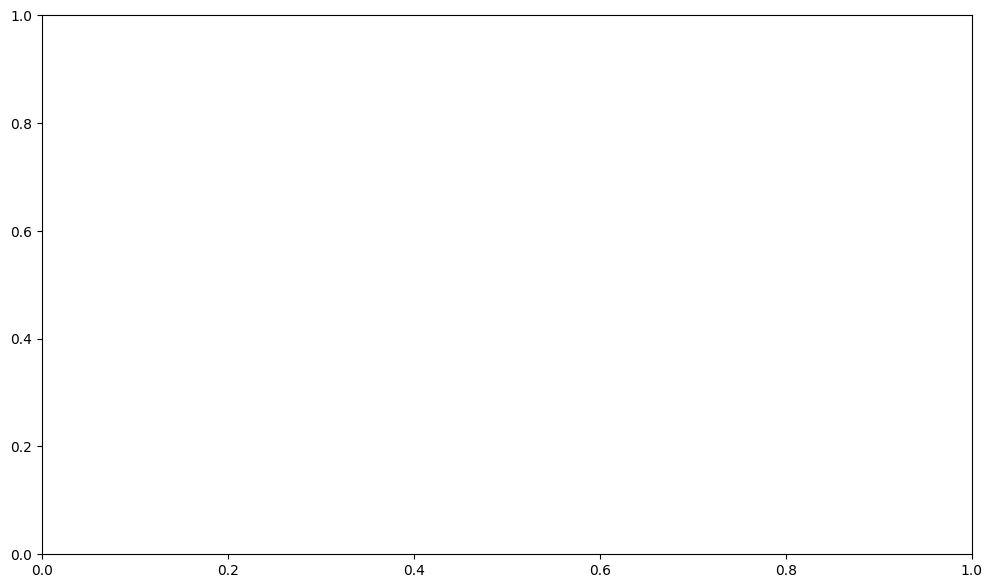

In [9]:
import matplotlib.pyplot as plt
import numpy as np
import re
import seaborn as sns

# Function to parse the data from the file
def parse_z_scores(file_path):
    z0_scores = []
    z1_scores = []
    
    with open(file_path, 'r') as file:
        for line in file:
            line = line.strip()
            if not line:
                continue
                
            # Extract Z_0 and Z_1 values using regex
            z0_match = re.search(r'Z_0,([0-9.-]+)', line)
            z1_match = re.search(r'Z_1,([0-9.-]+)', line)
            # z2_match = re.search(r'Z_2,([0-9.-]+)', line)
            # z3_match = re.search(r'Z_3,([0-9.-]+)', line)
            
            if z0_match and z1_match:
                z0_scores.append(float(z0_match.group(1)))
                z1_scores.append(float(z1_match.group(1)))
                # z2_scores.append(float(z2_match.group(1)))
                # z3_scores.append(float(z3_match.group(1)))
    
    return z0_scores, z1_scores

# Replace 'your_file.txt' with the path to your actual file
file_path = "/ephemeral/home/taremu/projects/watermark-supression/results/default/att=[algo=our,model=[name=mistralai/Mistral-7B-Instruct-v0.1,n_beams=1,sample=True,temp=0.7],learn=[mode=fast,nb_queries=15000],gen=[sp_str=8.0,w_abcd=2.0,w_p=1.0,w_e=0.5,w_f=0.0,rep_p=1.6,use_ftc=True]],serv=[model=[name=mistralai/Mistral-7B-Instruct-v0.1,n_beams=1,sample=True,temp=0.7],wm=[kgw]],meta=[seed=123],eval=[met=detector-ppl-self]/att_dolly.txt"
z0_scores, z1_scores = parse_z_scores(file_path)

# Create dataframe for seaborn
import pandas as pd
data = {
    'Z-Score': z0_scores + z1_scores, 
    'Key': ['Z_0'] * len(z0_scores) + ['Z_1'] * len(z1_scores)
    }
df = pd.DataFrame(data)

# Create the histogram
plt.figure(figsize=(12, 7))

# Plot histogram with KDE overlay
ax = sns.histplot(
    data=df,
    x='Z-Score',
    hue='Key',
    element='step',
    stat='density',
    alpha=0.6,
    bins=25,
    kde=True,
    palette=['blue', 'green']
)

# Add vertical lines for threshold values
# plt.axvline(x=3.09, color='darkred', linestyle='--', alpha=0.8, label='p=0.001 (z=3.09)')
plt.axvline(x=4.00, color='black', linestyle='--', alpha=0.8, label='p=3e-5 (z=4.00)')

# Shade the rejection region
xlim = plt.xlim()
# plt.axvspan(3.09, xlim[1], color='red', alpha=0.1)
plt.axvspan(4.00, xlim[1], color='red', alpha=0.2)

# Add statistics text
z0_mean = np.mean(z0_scores)
z1_mean = np.mean(z1_scores)
# z2_mean = np.mean(z2_scores)
# z3_mean = np.mean(z3_scores)
z0_std = np.std(z0_scores)
z1_std = np.std(z1_scores)
# z2_std = np.mean(z2_scores)
# z3_std = np.mean(z3_scores)
# z0_above_309 = sum(1 for z in z0_scores if z > 3.09)
# z1_above_309 = sum(1 for z in z1_scores if z > 3.09)
# z2_above_309 = sum(1 for z in z2_scores if z > 3.09)
# z3_above_309 = sum(1 for z in z3_scores if z > 3.09)
z0_above_400 = sum(1 for z in z0_scores if z > 4.00)
z1_above_400 = sum(1 for z in z1_scores if z > 4.00)
# z2_above_400 = sum(1 for z in z2_scores if z > 4.00)
# z3_above_400 = sum(1 for z in z3_scores if z > 4.00)

stats_text = (
    # f"Z_0: mean={z0_mean:.2f}, std={z0_std:.2f}, >3.09: {z0_above_309}/{len(z0_scores)}, >4.00: {z0_above_400}/{len(z0_scores)}\n"
    # f"Z_1: mean={z1_mean:.2f}, std={z1_std:.2f}, >3.09: {z1_above_309}/{len(z1_scores)}, >4.00: {z1_above_400}/{len(z1_scores)}"
    f"Z_0: mean={z0_mean:.2f}, std={z0_std:.2f}, >4.00: {z0_above_400}/{len(z0_scores)}\n"
    f"Z_1: mean={z1_mean:.2f}, std={z1_std:.2f}, >4.00: {z1_above_400}/{len(z1_scores)}"
    # f"Z_2: mean={z2_mean:.2f}, std={z2_std:.2f}, >4.00: {z2_above_400}/{len(z2_scores)}\n"
    # f"Z_1: mean={z3_mean:.2f}, std={z3_std:.2f}, >4.00: {z3_above_400}/{len(z1_scores)}"
)
plt.figtext(0.5, 0.01, stats_text, ha='center', fontsize=10, bbox={"facecolor":"white", "alpha":0.5, "pad":5})

# Customize the plot
plt.title('Distribution', fontsize=15)
plt.xlabel('Z-Score', fontsize=12)
plt.ylabel('Density', fontsize=12)
plt.legend(title='Key')
plt.grid(True, alpha=0.3)

# Show the plot
plt.tight_layout()
plt.subplots_adjust(bottom=0.15)  # Make room for the stats text
plt.savefig('z_score_histogram.png', dpi=300)
plt.show()

# # Print summary statistics
# print(f"Total samples: {len(z0_scores)}")
# print(f"Z_0 statistics: Mean={z0_mean:.2f}, Std={z0_std:.2f}")
# print(f"Z_1 statistics: Mean={z1_mean:.2f}, Std={z1_std:.2f}")
# print(f"Z_0 scores above 3.09: {z0_above_309} ({z0_above_309/len(z0_scores)*100:.1f}%)")
# print(f"Z_1 scores above 3.09: {z1_above_309} ({z1_above_309/len(z1_scores)*100:.1f}%)")
# print(f"Z_0 scores above 4.00: {z0_above_400} ({z0_above_400/len(z0_scores)*100:.1f}%)")
# print(f"Z_1 scores above 4.00: {z1_above_400} ({z1_above_400/len(z1_scores)*100:.1f}%)")

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import re
import seaborn as sns

# Function to parse the data from the file
def parse_z_scores(file_path):
    z0_scores = []
    z1_scores = []
    z2_scores = []
    z3_scores = []
    
    with open(file_path, 'r') as file:
        for line in file:
            line = line.strip()
            if not line:
                continue
                
            # Extract Z_0 and Z_1 values using regex
            z0_match = re.search(r'Z_0,([0-9.-]+)', line)
            z1_match = re.search(r'Z_1,([0-9.-]+)', line)
            z2_match = re.search(r'Z_2,([0-9.-]+)', line)
            z3_match = re.search(r'Z_3,([0-9.-]+)', line)
            
            if z0_match and z1_match and z2_match and z3_match:
                z0_scores.append(float(z0_match.group(1)))
                z1_scores.append(float(z1_match.group(1)))
                z2_scores.append(float(z2_match.group(1)))
                z3_scores.append(float(z3_match.group(1)))
    
    return z0_scores, z1_scores, z2_scores, z3_scores

# Replace 'your_file.txt' with the path to your actual file
file_path = "/ephemeral/home/taremu/projects/watermark-supression/results/default/att=[algo=our,model=[name=mistralai/Mistral-7B-Instruct-v0.1,n_beams=1,sample=True,temp=0.7],learn=[mode=fast,nb_queries=20000],gen=[sp_str=3.0,w_abcd=0.0,w_p=0.0,w_e=1.0,w_f=0.0,rep_p=1.0,use_ftc=True]],serv=[model=[name=mistralai/Mistral-7B-Instruct-v0.1,n_beams=1,sample=True,temp=0.7],wm=[kgw]],meta=[seed=123],eval=[met=detector-ppl-self]/spoofing_dolly-writing-100-long_3.0.txt"
z0_scores, z1_scores, z2_scores, z3_scores = parse_z_scores(file_path)

# Create dataframe for seaborn
import pandas as pd
data = {
    'Z-Score': z0_scores + z1_scores + z2_scores + z3_scores,
    'Key': ['Z_0'] * len(z0_scores) + ['Z_1'] * len(z1_scores) + ['Z_2'] * len(z2_scores) + ['Z_3'] * len(z3_scores)
}
df = pd.DataFrame(data)

# Create the histogram
plt.figure(figsize=(12, 7))

# Plot histogram with KDE overlay
ax = sns.histplot(
    data=df,
    x='Z-Score',
    hue='Key',
    element='step',
    stat='density',
    alpha=0.6,
    bins=25,
    kde=True,
    palette=['blue', 'green']
)

# Add vertical lines for threshold values
# plt.axvline(x=3.09, color='darkred', linestyle='--', alpha=0.8, label='p=0.001 (z=3.09)')
plt.axvline(x=4.00, color='black', linestyle='--', alpha=0.8, label='p=3e-5 (z=4.00)')

# Shade the rejection region
xlim = plt.xlim()
# plt.axvspan(3.09, xlim[1], color='red', alpha=0.1)
plt.axvspan(4.00, xlim[1], color='red', alpha=0.2)

# Add statistics text
z0_mean = np.mean(z0_scores)
z1_mean = np.mean(z1_scores)
z2_mean = np.mean(z2_scores)
z3_mean = np.mean(z3_scores)
z0_std = np.std(z0_scores)
z1_std = np.std(z1_scores)
z2_std = np.mean(z2_scores)
z3_std = np.mean(z3_scores)
# z0_above_309 = sum(1 for z in z0_scores if z > 3.09)
# z1_above_309 = sum(1 for z in z1_scores if z > 3.09)
# z2_above_309 = sum(1 for z in z2_scores if z > 3.09)
# z3_above_309 = sum(1 for z in z3_scores if z > 3.09)
z0_above_400 = sum(1 for z in z0_scores if z > 4.00)
z1_above_400 = sum(1 for z in z1_scores if z > 4.00)
z2_above_400 = sum(1 for z in z2_scores if z > 4.00)
z3_above_400 = sum(1 for z in z3_scores if z > 4.00)

stats_text = (
    # f"Z_0: mean={z0_mean:.2f}, std={z0_std:.2f}, >3.09: {z0_above_309}/{len(z0_scores)}, >4.00: {z0_above_400}/{len(z0_scores)}\n"
    # f"Z_1: mean={z1_mean:.2f}, std={z1_std:.2f}, >3.09: {z1_above_309}/{len(z1_scores)}, >4.00: {z1_above_400}/{len(z1_scores)}"
    f"Z_0: mean={z0_mean:.2f}, std={z0_std:.2f}, >4.00: {z0_above_400}/{len(z0_scores)}\n"
    f"Z_1: mean={z1_mean:.2f}, std={z1_std:.2f}, >4.00: {z1_above_400}/{len(z1_scores)}\n"
    f"Z_2: mean={z2_mean:.2f}, std={z2_std:.2f}, >4.00: {z2_above_400}/{len(z2_scores)}\n"
    f"Z_1: mean={z3_mean:.2f}, std={z3_std:.2f}, >4.00: {z3_above_400}/{len(z1_scores)}"
)
plt.figtext(0.5, 0.01, stats_text, ha='center', fontsize=10, bbox={"facecolor":"white", "alpha":0.5, "pad":5})

# Customize the plot
plt.title('Distribution', fontsize=15)
plt.xlabel('Z-Score', fontsize=12)
plt.ylabel('Density', fontsize=12)
plt.legend(title='Key')
plt.grid(True, alpha=0.3)

# Show the plot
plt.tight_layout()
plt.subplots_adjust(bottom=0.15)  # Make room for the stats text
plt.savefig('z_score_histogram.png', dpi=300)
plt.show()

# # Print summary statistics
# print(f"Total samples: {len(z0_scores)}")
# print(f"Z_0 statistics: Mean={z0_mean:.2f}, Std={z0_std:.2f}")
# print(f"Z_1 statistics: Mean={z1_mean:.2f}, Std={z1_std:.2f}")
# print(f"Z_0 scores above 3.09: {z0_above_309} ({z0_above_309/len(z0_scores)*100:.1f}%)")
# print(f"Z_1 scores above 3.09: {z1_above_309} ({z1_above_309/len(z1_scores)*100:.1f}%)")
# print(f"Z_0 scores above 4.00: {z0_above_400} ({z0_above_400/len(z0_scores)*100:.1f}%)")
# print(f"Z_1 scores above 4.00: {z1_above_400} ({z1_above_400/len(z1_scores)*100:.1f}%)")